In [2]:
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Khởi tạo danh sách
data = []

# Thư mục gốc chứa dữ liệu
root_dir = "/kaggle/input/dataimage/dataprojectfinal"

# Duyệt qua các thư mục
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    if os.path.isdir(folder_path):
        # Lấy thông tin từ tên thư mục
        if folder_name == "0-3":  # Xử lý riêng cho 0-3 tuổi
            age_label = 0  # Nhãn độ tuổi là 0
            gender_label = -1  # Không có nhãn giới tính (gán -1 cho nhóm không phân giới tính)
        else:
            age_range = folder_name.split('-')[0]  # Lấy nhóm tuổi
            gender_label = 0 if "Nam" in folder_name else 1  # Nam = 0, Nữ = 1
            age_label = int(folder_name.split('-')[0])  # Nhãn độ tuổi dựa trên khoảng tuổi
        
        # Duyệt qua từng file ảnh
        for file_name in os.listdir(folder_path):
            if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Chỉ xử lý file ảnh
                file_path = os.path.join(folder_path, file_name)
                data.append([file_path, gender_label, age_label])

# Tạo DataFrame và lưu thành file CSV
df = pd.DataFrame(data, columns=["image_path", "gender_label", "age_label"])

# Hiển thị các nhãn độ tuổi và giới tính
print("Các nhãn độ tuổi có trong df:")
print(df['age_label'].unique())

print("\nCác nhãn giới tính có trong df:")
print(df['gender_label'].unique())


Các nhãn độ tuổi có trong df:
[11 61  4 51 41 31  0 21 71]

Các nhãn giới tính có trong df:
[ 1  0 -1]


In [4]:
df.head()

,image_path,gender_label,age_label
0,/kaggle/input/dataimage/dataprojectfinal/11-20...,1,11
1,/kaggle/input/dataimage/dataprojectfinal/11-20...,1,11
2,/kaggle/input/dataimage/dataprojectfinal/11-20...,1,11
3,/kaggle/input/dataimage/dataprojectfinal/11-20...,1,11
4,/kaggle/input/dataimage/dataprojectfinal/11-20...,1,11


In [5]:
# Kiểm tra số lượng theo độ tuổi
age_counts = df['age_label'].value_counts()
print("Số lượng dữ liệu theo từng độ tuổi:")
print(age_counts)

# Kiểm tra số lượng theo giới tính
gender_counts = df['gender_label'].value_counts()
print("Số lượng dữ liệu theo từng giới tính:")
print(gender_counts)

Số lượng dữ liệu theo từng độ tuổi:
age_label
21    7805
31    4347
51    2226
0     2121
41    2103
11    1682
4     1371
71    1266
61    1185
Name: count, dtype: int64
Số lượng dữ liệu theo từng giới tính:
gender_label
 0    11555
 1    10430
-1     2121
Name: count, dtype: int64


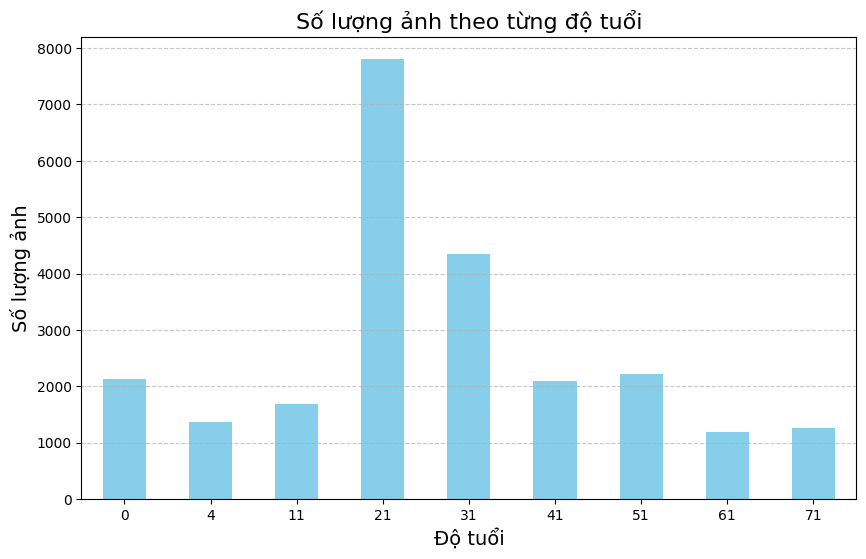

In [6]:
import matplotlib.pyplot as plt

# Đếm số lượng ảnh theo độ tuổi
age_counts = df['age_label'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title("Số lượng ảnh theo từng độ tuổi", fontsize=16)
plt.xlabel("Độ tuổi", fontsize=14)
plt.ylabel("Số lượng ảnh", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

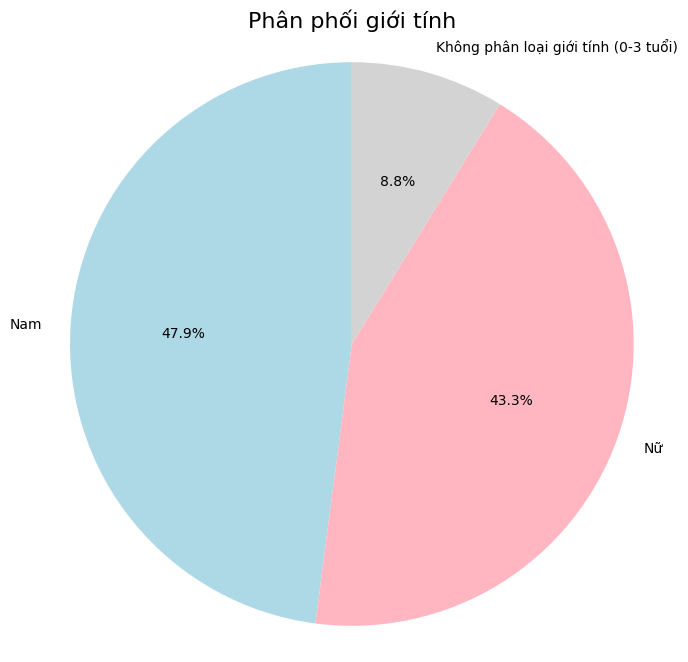

In [7]:
import matplotlib.pyplot as plt

# Đếm số lượng ảnh theo giới tính (bao gồm nhãn -1)
gender_counts = df['gender_label'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))

# Nhãn cho các phần trong biểu đồ (bao gồm Nam, Nữ và -1 cho nhóm không phân loại giới tính)
labels = ["Nam", "Nữ", "Không phân loại giới tính (0-3 tuổi)"]

# Màu sắc cho các phần trong biểu đồ
colors = ["lightblue", "lightpink", "lightgray"]

# Vẽ biểu đồ tròn
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Tiêu đề và các cài đặt cho biểu đồ
plt.title("Phân phối giới tính", fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()

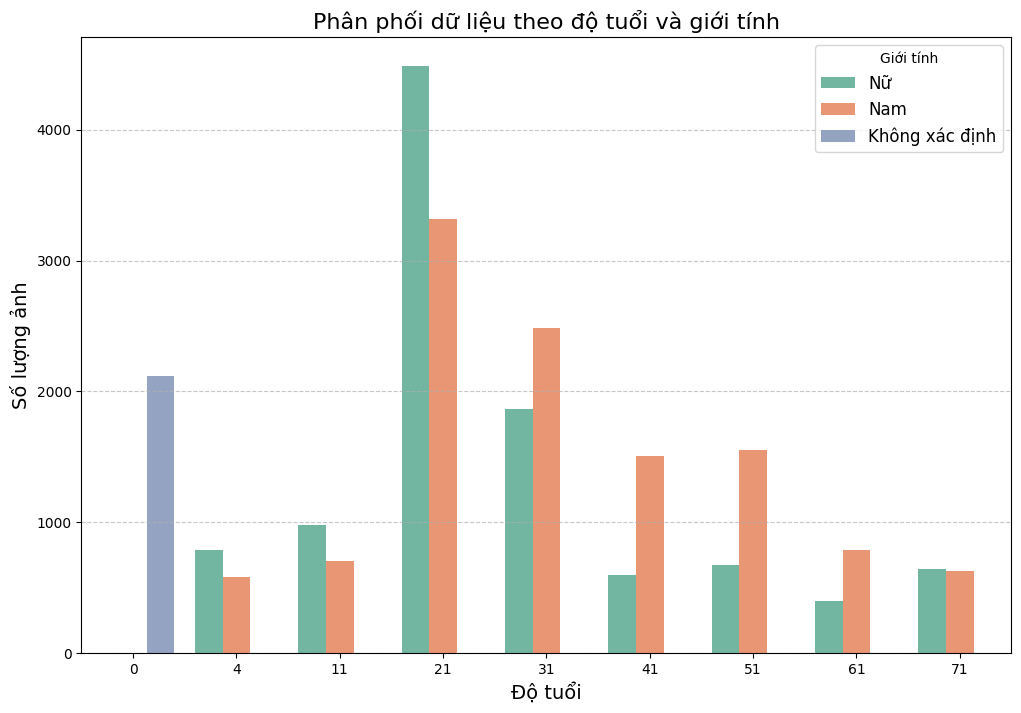

In [8]:
import seaborn as sns

# Thay thế -1 (nhóm 0-3 tuổi không có giới tính) thành "Không xác định"
df['gender_label'] = df['gender_label'].replace(-1, "Không xác định")
df['gender_label'] = df['gender_label'].replace(0, "Nam").replace(1, "Nữ")

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_label', hue='gender_label', palette="Set2")
plt.title("Phân phối dữ liệu theo độ tuổi và giới tính", fontsize=16)
plt.xlabel("Độ tuổi", fontsize=14)
plt.ylabel("Số lượng ảnh", fontsize=14)
plt.legend(title="Giới tính", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

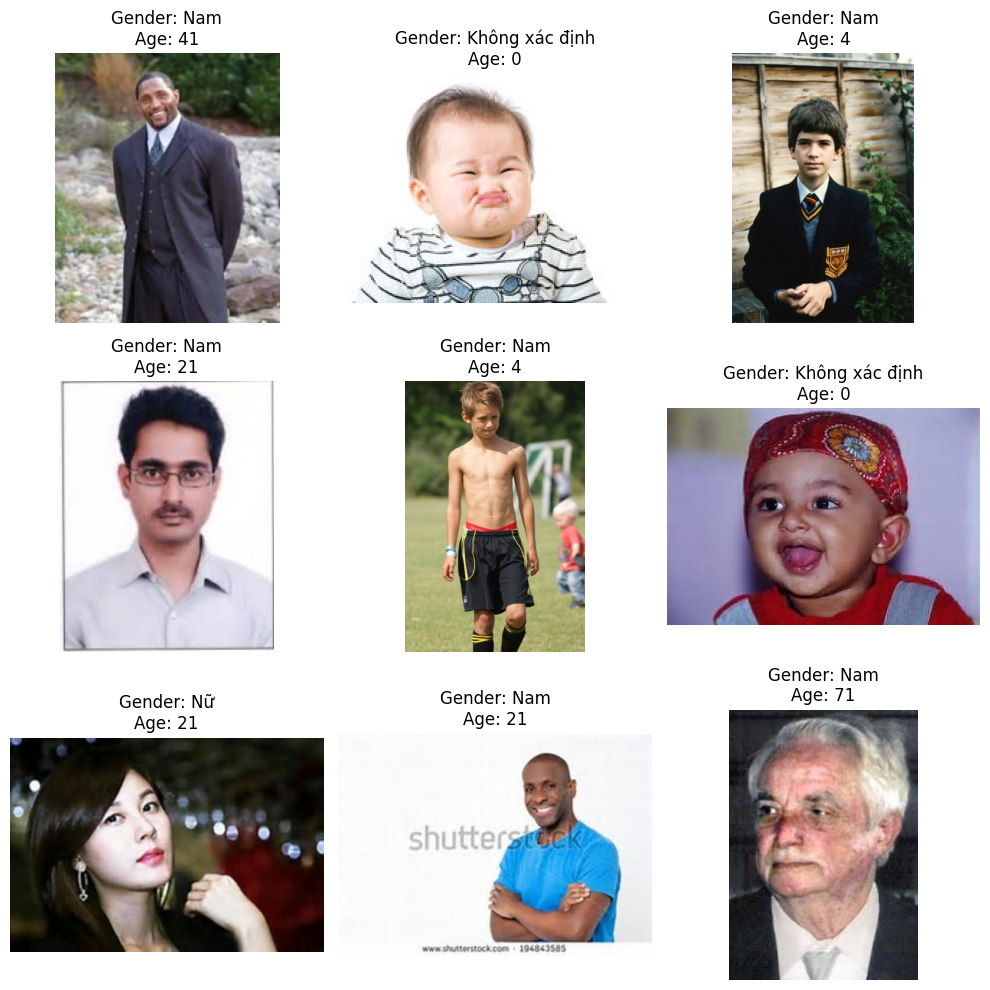

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
# Hàm để hiển thị ảnh mẫu từ đường dẫn
def plot_sample_images(df, num_images=9):
    plt.figure(figsize=(10, 10))
    
    sample_df = df.sample(n=num_images)  # Chọn ngẫu nhiên một số ảnh
    for i, row in enumerate(sample_df.itertuples(), start=1):
        img = cv2.imread(row.image_path)  # Đọc ảnh
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB để hiển thị
        
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.title(f"Gender: {row.gender_label}\nAge: {row.age_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Hiển thị ảnh mẫu
plot_sample_images(df)

Corrupt JPEG data: bad Huffman code
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: premature end of data segment


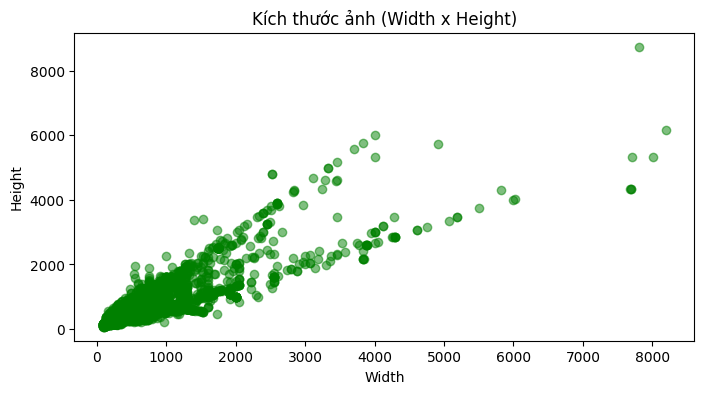

In [11]:
# Lấy kích thước ảnh
def get_image_shapes(df):
    shapes = []
    for path in df['image_path']:
        img = cv2.imread(path)
        if img is not None:
            shapes.append(img.shape[:2])  # Chỉ lấy chiều cao, chiều rộng
    return np.array(shapes)

# Tính kích thước ảnh
shapes = get_image_shapes(df)

# Trực quan hóa kích thước
plt.figure(figsize=(8, 4))
plt.scatter(shapes[:, 1], shapes[:, 0], alpha=0.5, color='green')
plt.title('Kích thước ảnh (Width x Height)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [13]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Tải mô hình MobileNetV2 đã được tiền huấn luyện
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# Hàm chuẩn bị ImageDataGenerator cho việc đọc ảnh theo batch
def prepare_data_generator(df, batch_size=32, target_size=(224, 224)):
    # Khởi tạo ImageDataGenerator
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    # Tạo một generator để đọc ảnh từ DataFrame
    def generator():
        for row in df.itertuples():
            img = tf.keras.preprocessing.image.load_img(row.image_path, target_size=target_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img)  # Chuyển ảnh thành mảng
            img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
            yield img_array, row.gender_label  # Trả về ảnh và nhãn

    return generator

# Tạo generator
batch_size = 1024
train_generator = prepare_data_generator(df, batch_size=batch_size)

# Hàm trích xuất đặc trưng từ batch
def extract_features_batch(df, base_model, batch_size=32):
    features = []
    labels = []
    generator = prepare_data_generator(df, batch_size=batch_size)

    # Duyệt qua các batch trong generator
    for batch_images, batch_labels in generator():
        batch_features = base_model.predict(batch_images)  # Trích xuất đặc trưng từ batch
        features.append(batch_features.flatten())  # Flatten để dễ xử lý
        labels.append(batch_labels)

        # Dừng lại khi hoàn thành toàn bộ dataset hoặc số lượng batch đủ
        if len(features) * batch_size >= len(df):
            break

    return np.array(features), np.array(labels)

# Trích xuất đặc trưng từ DataFrame theo batch
features, labels = extract_features_batch(df, base_model, batch_size=batch_size)

# Kiểm tra kết quả
print(f"Shape của đặc trưng: {features.shape}")


/tmp/ipykernel_30/324824548.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Shape của đặc trưng: (24, 1280)


In [2]:
# Kiểm tra các giá trị trong gender_label và age_label
# Đảm bảo rằng gender_label chỉ có giá trị 0 (Nam), 1 (Nữ), hoặc -1 (0-3 tuổi không phân biệt giới tính)
df = df[df['gender_label'].isin([0, 1, -1])]  # Loại bỏ các giá trị ngoài 0, 1 hoặc -1
print(df['gender_label'].unique())  # Xem các giá trị unique trong gender_label
print(df['age_label'].unique())  # Xem các giá trị unique trong age_label



[ 1  0 -1]
[11 61  4 51 41 31  0 21 71]


In [3]:
# Các nhãn tuổi ban đầu
age_labels = sorted(df['age_label'].unique())  # Sắp xếp các giá trị nhãn

# Ánh xạ giá trị ban đầu về nhãn liên tục
age_label_mapping = {value: index for index, value in enumerate(age_labels)}

print("Mapping age_label:")
print(age_label_mapping)


Mapping age_label:
{0: 0, 4: 1, 11: 2, 21: 3, 31: 4, 41: 5, 51: 6, 61: 7, 71: 8}


In [4]:
# Mã hóa age_label
df['age_label'] = df['age_label'].map(age_label_mapping)
num_age_classes = len(age_label_mapping)  # Số lớp = số giá trị unique

# Kiểm tra giá trị sau khi mã hóa
print("Age labels after encoding:", df['age_label'].unique())

Age labels after encoding: [2 7 1 6 5 4 0 3 8]


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical

def data_generator(image_paths, labels, num_age_classes=10):
    images = []
    ages = []
    genders = []

    for i in range(len(image_paths)):
        # Đảm bảo image_paths.iloc[i] trả về chuỗi (scalar)
        file_path = image_paths.iloc[i]['image_path'] if isinstance(image_paths, pd.DataFrame) else image_paths.iloc[i]
        
        # Tiền xử lý ảnh
        img = load_img(file_path, target_size=(150, 150))  # Đọc ảnh và resize
        img = img_to_array(img) / 255.0  # Chuyển thành numpy array và chuẩn hóa [0, 1]
        images.append(img)

        # Xử lý nhãn độ tuổi (age_label) và giới tính (gender_label)
        age_one_hot = to_categorical(labels.iloc[i]['age_label'], num_classes=num_age_classes)
        ages.append(age_one_hot)

        gender_one_hot = to_categorical(labels.iloc[i]['gender_label'], num_classes=2)
        genders.append(gender_one_hot)

    # Chuyển tất cả thành numpy arrays
    images = np.array(images)
    ages = np.array(ages)
    genders = np.array(genders)

    return images, {'age_output': ages, 'gender_output': genders}


In [5]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện (train) và kiểm tra (test)
X_train, X_test, y_train, y_test = train_test_split(
    df[['image_path']],  # Chỉ lấy cột đường dẫn ảnh
    df[['gender_label', 'age_label']],  # Lấy nhãn giới tính và độ tuổi
    test_size=0.2,  # 20% cho test
    random_state=42,  # Để kết quả có thể tái tạo
    stratify=df['gender_label']  # Duy trì tỷ lệ giới tính trong các tập
)

# Kiểm tra
print("Số lượng ảnh trong tập huấn luyện:", len(X_train))
print("Số lượng ảnh trong tập kiểm tra:", len(X_test))


Số lượng ảnh trong tập huấn luyện: 19284
Số lượng ảnh trong tập kiểm tra: 4822


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Định nghĩa mô hình CNN
def build_model(input_shape=(150, 150, 3), num_age_classes=9): 
    input_layer = layers.Input(shape=input_shape)

    # Tầng convolutional đầu tiên
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)

    # Tầng convolutional thứ hai
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Tầng convolutional thứ ba
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Flatten và Fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Đầu ra giới tính 
    gender_output = layers.Dense(2, activation='softmax', name='gender_output')(x)

    # Đầu ra độ tuổi (phân loại có nhiều nhóm độ tuổi)
    age_output = layers.Dense(num_age_classes, activation='softmax', name='age_output')(x)

    # Tạo mô hình
    model = models.Model(inputs=input_layer, outputs=[gender_output, age_output])

    # Compile mô hình
    model.compile(optimizer='adam', 
                  loss={'gender_output': 'categorical_crossentropy', 'age_output': 'categorical_crossentropy'},
                  metrics={'gender_output': 'accuracy', 'age_output': 'accuracy'})

    return model

# Xây dựng mô hình
model = build_model(input_shape=(150, 150, 3), num_age_classes=9)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 150, 150,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 75, 75,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 75, 75,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 37, 37,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 37, 37,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 18, 18,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 41472)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  5,308,544 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 2)         │        258 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 9)         │      1,161 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,403,211 (20.61 MB)

 Trainable params: 5,403,211 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Nạp toàn bộ dữ liệu train và test
X_train_images, y_train_outputs = data_generator(X_train, y_train, num_age_classes)
X_test_images, y_test_outputs = data_generator(X_test, y_test, num_age_classes)

# Huấn luyện mô hình
history = model.fit(
    X_train_images,
    y_train_outputs,
    epochs=10,
    validation_data=(X_test_images, y_test_outputs)
)


Epoch 1/10


I0000 00:00:1733150860.893641      98 service.cc:145] XLA service 0x78eb180084c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733150860.893747      98 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733150860.893756      98 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  5/603 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - age_output_accuracy: 0.2039 - gender_output_accuracy: 0.4376 - loss: 3.6397 

I0000 00:00:1733150868.720609      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


603/603 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - age_output_accuracy: 0.3208 - gender_output_accuracy: 0.5918 - loss: 2.6353 - val_age_output_accuracy: 0.3602 - val_gender_output_accuracy: 0.7140 - val_loss: 2.3434
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - age_output_accuracy: 0.3612 - gender_output_accuracy: 0.7237 - loss: 2.3250 - val_age_output_accuracy: 0.3791 - val_gender_output_accuracy: 0.7572 - val_loss: 2.1936
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - age_output_accuracy: 0.3855 - gender_output_accuracy: 0.7616 - loss: 2.1832 - val_age_output_accuracy: 0.3996 - val_gender_output_accuracy: 0.7887 - val_loss: 2.0844
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - age_output_accuracy: 0.4204 - gender_output_accuracy: 0.8025 - loss: 2.0166 - val_age_output_accuracy: 0.4121 - val_gender_output_accuracy: 0.8061 - val_loss: 2.0397
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - age_output_accuracy: 0.4506 - gender_output_accuracy: 0.8412 - loss

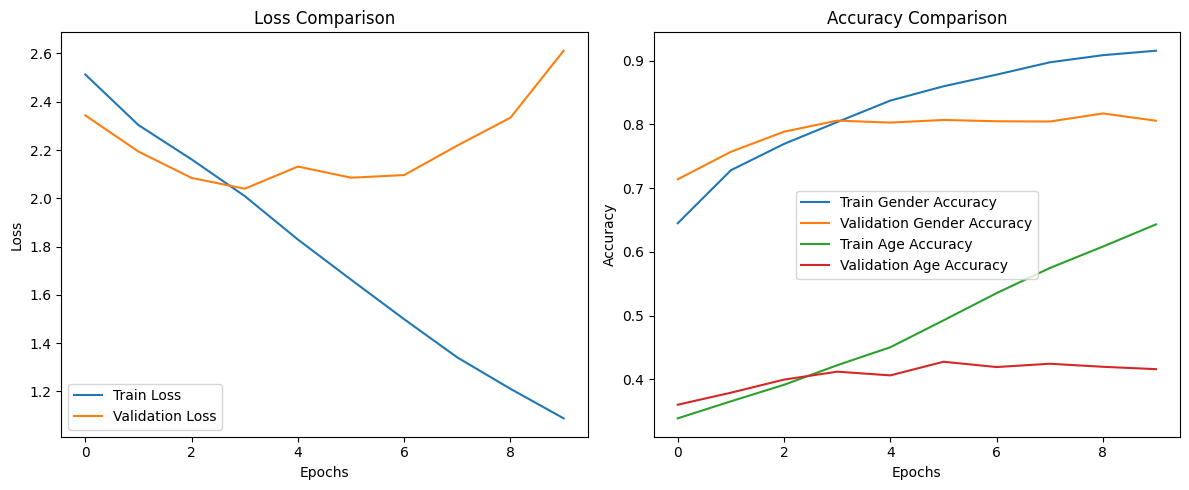

In [10]:
import matplotlib.pyplot as plt
# Trực quan hóa loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Trực quan hóa accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['gender_output_accuracy'], label='Train Gender Accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='Validation Gender Accuracy')
plt.plot(history.history['age_output_accuracy'], label='Train Age Accuracy')
plt.plot(history.history['val_age_output_accuracy'], label='Validation Age Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

def data_generator_aug(image_paths, labels, num_age_classes=10, augment=False):
    images = []
    ages = []
    genders = []

    for i in range(len(image_paths)):
        # Đảm bảo image_paths.iloc[i] trả về chuỗi (scalar)
        file_path = image_paths.iloc[i]['image_path'] if isinstance(image_paths, pd.DataFrame) else image_paths.iloc[i]
        
        # Tiền xử lý ảnh
        img = load_img(file_path, target_size=(128, 128))  # Đọc ảnh và resize
        img = img_to_array(img) / 255.0  # Chuyển thành numpy array và chuẩn hóa [0, 1]

        # Tăng cường dữ liệu nếu cần
        if augment:
            img = augment_image(img)

        images.append(img)

        # Xử lý nhãn độ tuổi (age_label) và giới tính (gender_label)
        age_one_hot = to_categorical(labels.iloc[i]['age_label'], num_classes=num_age_classes)
        ages.append(age_one_hot)

        gender_one_hot = to_categorical(labels.iloc[i]['gender_label'], num_classes=2)
        genders.append(gender_one_hot)

    # Chuyển tất cả thành numpy arrays
    images = np.array(images)
    ages = np.array(ages)
    genders = np.array(genders)

    return images, {'age_output': ages, 'gender_output': genders}


def augment_image(image):
    """
    Hàm áp dụng tăng cường dữ liệu trên một hình ảnh
    """
    image = tf.image.random_flip_left_right(image)  # Lật ngang ngẫu nhiên
    image = tf.image.random_brightness(image, max_delta=0.2)  # Thay đổi độ sáng ngẫu nhiên
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Thay đổi độ tương phản
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)  # Thay đổi độ bão hòa
    image = tf.image.random_hue(image, max_delta=0.02)  # Thay đổi sắc thái ngẫu nhiên
    image = tf.image.resize_with_crop_or_pad(image, 140, 140)  # Thêm khoảng padding
    image = tf.image.random_crop(image, size=[128, 128, 3])  # Cắt ngẫu nhiên về kích thước ban đầu

    return image


In [7]:
# Áp dụng tăng cường dữ liệu cho tập huấn luyện
X_train_images, y_train_outputs = data_generator_aug(X_train, y_train, num_age_classes, augment=True)

# Không áp dụng tăng cường dữ liệu cho tập kiểm tra
X_test_images, y_test_outputs = data_generator_aug(X_test, y_test, num_age_classes, augment=False)


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Định nghĩa mô hình CNN
def build_model(input_shape=(128, 128, 3), num_age_classes=9): 
    input_layer = layers.Input(shape=input_shape)

    # Tầng convolutional đầu tiên
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Tầng convolutional thứ hai
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Tầng convolutional thứ ba
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Flatten và Fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Đầu ra giới tính 
    gender_output = layers.Dense(2, activation='softmax', name='gender_output')(x)

    # Đầu ra độ tuổi (phân loại có nhiều nhóm độ tuổi)
    age_output = layers.Dense(num_age_classes, activation='softmax', name='age_output')(x)

    # Tạo mô hình
    model = models.Model(inputs=input_layer, outputs=[gender_output, age_output])

    # Compile mô hình
    model.compile(optimizer='adam', 
                  loss={'gender_output': 'categorical_crossentropy', 'age_output': 'categorical_crossentropy'},
                  metrics={'gender_output': 'accuracy', 'age_output': 'accuracy'})

    return model

# Xây dựng mô hình
model = build_model(input_shape=(128, 128, 3), num_age_classes=9)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 16, 16,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 8, 8, 128) │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8192)      │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  1,048,704 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 2)         │        258 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 9)         │      1,161 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,147,563 (4.38 MB)

 Trainable params: 1,147,563 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Huấn luyện mô hình
history = model.fit(
    X_train_images,
    y_train_outputs,
    epochs=10,
    validation_data=(X_test_images, y_test_outputs)
)


Epoch 1/10


I0000 00:00:1733152422.990910     372 service.cc:145] XLA service 0x7a75a400bf80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733152422.990968     372 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733152422.990978     372 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 13/603 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - age_output_accuracy: 0.2618 - gender_output_accuracy: 0.5456 - loss: 2.7963  

I0000 00:00:1733152433.223331     372 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


603/603 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - age_output_accuracy: 0.3252 - gender_output_accuracy: 0.5672 - loss: 2.6257 - val_age_output_accuracy: 0.3463 - val_gender_output_accuracy: 0.7063 - val_loss: 2.3782
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.3490 - gender_output_accuracy: 0.6933 - loss: 2.4070 - val_age_output_accuracy: 0.3735 - val_gender_output_accuracy: 0.7621 - val_loss: 2.2136
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.3682 - gender_output_accuracy: 0.7436 - loss: 2.2668 - val_age_output_accuracy: 0.3866 - val_gender_output_accuracy: 0.7825 - val_loss: 2.1054
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.3933 - gender_output_accuracy: 0.7897 - loss: 2.1124 - val_age_output_accuracy: 0.4158 - val_gender_output_accuracy: 0.8051 - val_loss: 2.0033
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.4160 - gender_output_accuracy: 0.8154 - loss: 2.

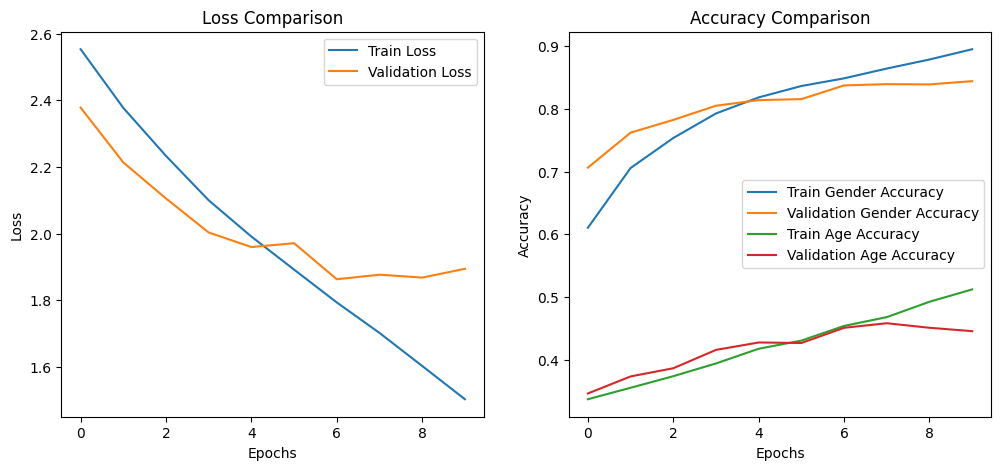

In [13]:
import matplotlib.pyplot as plt
# Trực quan hóa loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Trực quan hóa accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['gender_output_accuracy'], label='Train Gender Accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='Validation Gender Accuracy')
plt.plot(history.history['age_output_accuracy'], label='Train Age Accuracy')
plt.plot(history.history['val_age_output_accuracy'], label='Validation Age Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Early stopping để dừng huấn luyện khi val_loss không cải thiện
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Reduce learning rate khi val_loss không giảm
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6
)


In [17]:
# Huấn luyện mô hình
history = model.fit(
    X_train_images, 
    y_train_outputs, 
    validation_data=(X_test_images, y_test_outputs),
    batch_size=32,
    epochs=50,  # Giữ số lượng epochs lớn, nhưng EarlyStopping sẽ dừng sớm
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - age_output_accuracy: 0.5303 - gender_output_accuracy: 0.9067 - loss: 1.4233 - val_age_output_accuracy: 0.4498 - val_gender_output_accuracy: 0.8362 - val_loss: 1.9579 - learning_rate: 0.0010
Epoch 2/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.5548 - gender_output_accuracy: 0.9149 - loss: 1.3165 - val_age_output_accuracy: 0.4450 - val_gender_output_accuracy: 0.8380 - val_loss: 2.0829 - learning_rate: 0.0010
Epoch 3/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.5863 - gender_output_accuracy: 0.9207 - loss: 1.2231 - val_age_output_accuracy: 0.4386 - val_gender_output_accuracy: 0.8411 - val_loss: 2.1892 - learning_rate: 0.0010
Epoch 4/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.6091 - gender_output_accuracy: 0.9286 - loss: 1.1513 - val_age_output_accuracy: 0.4380 - val_gender_output_accuracy: 0.8353 - val_loss: 2.2253 - learning_rate: 0.0010
Epoch 5/50
603/603 ━

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Early stopping để dừng huấn luyện khi val_loss không cải thiện
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Reduce learning rate khi val_loss không giảm
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6
)

# Lưu lại mô hình tốt nhất (dựa trên val_loss)
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Đường dẫn để lưu tệp
    monitor='val_loss',       # Theo dõi chỉ số val_loss
    save_best_only=True,      # Chỉ lưu mô hình khi val_loss tốt hơn
    save_weights_only=False,  # Lưu cả kiến trúc và trọng số mô hình
    mode='min',               # Lưu khi val_loss đạt giá trị nhỏ nhất
    verbose=1                 # In ra log khi lưu mô hình
)

# Huấn luyện mô hình
history = model.fit(
    X_train_images, 
    y_train_outputs, 
    validation_data=(X_test_images, y_test_outputs),
    batch_size=32,
    epochs=50,  # Giữ số lượng epochs lớn, nhưng EarlyStopping sẽ dừng sớm
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)



Epoch 1/50
600/603 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - age_output_accuracy: 0.5877 - gender_output_accuracy: 0.9270 - loss: 1.2292
Epoch 1: val_loss improved from inf to 2.12205, saving model to best_model.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - age_output_accuracy: 0.5877 - gender_output_accuracy: 0.9270 - loss: 1.2291 - val_age_output_accuracy: 0.4527 - val_gender_output_accuracy: 0.8459 - val_loss: 2.1220 - learning_rate: 5.0000e-04
Epoch 2/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - age_output_accuracy: 0.6070 - gender_output_accuracy: 0.9380 - loss: 1.1405
Epoch 2: val_loss improved from 2.12205 to 2.11502, saving model to best_model.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - age_output_accuracy: 0.6070 - gender_output_accuracy: 0.9380 - loss: 1.1405 - val_age_output_accuracy: 0.4457 - val_gender_output_accuracy: 0.8434 - val_loss: 2.1150 - learning_rate: 5.0000e-04
Epoch 3/50
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - age_output_accuracy: 0.6311 - gender_outp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


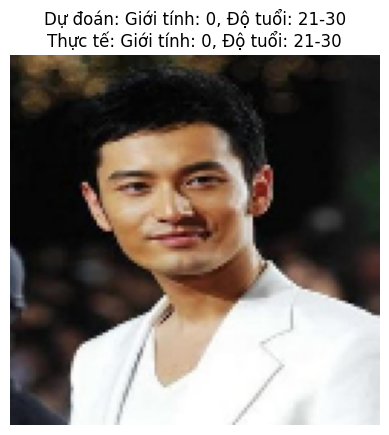

Xác suất dự đoán giới tính: [[9.998236e-01 1.764333e-04]]
Xác suất dự đoán độ tuổi: [[3.5807566e-09 1.5898029e-05 1.6903652e-02 4.9328712e-01 1.7112498e-01
  2.6618224e-01 4.4517200e-02 7.9167681e-03 5.2180858e-05]]
Dự đoán: Giới tính: 0, Độ tuổi: 21-30
Thực tế: Giới tính: 0, Độ tuổi: 21-30


In [28]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Tải mô hình đã lưu
best_model = load_model('best_model.keras')
# Bảng ánh xạ tuổi theo khoảng
age_mapping = {0: 0, 4: 1, 11: 2, 21: 3, 31: 4, 41: 5, 51: 6, 61: 7, 71: 8}

# Tạo hàm để ánh xạ từ nhãn sang khoảng tuổi
def map_age_label_to_range(predicted_label, mapping):
    sorted_ages = sorted(mapping.keys())  # Sắp xếp các mốc tuổi
    if predicted_label >= len(sorted_ages) - 1:
        return f"{sorted_ages[-1]}+"  # Nếu là nhãn cuối, trả về "tuổi lớn nhất+"
    return f"{sorted_ages[predicted_label]}-{sorted_ages[predicted_label + 1] - 1}"

# Chọn một ảnh từ X_test_images để dự đoán
index = 0  # Thử nghiệm với ảnh đầu tiên
test_image = X_test_images[index]

# Tiền xử lý ảnh: Thêm batch dimension
input_image = np.expand_dims(test_image, axis=0)

# Thực hiện dự đoán
predictions = best_model.predict(input_image)

# Tách kết quả dự đoán
gender_prediction = np.argmax(predictions[0])  # Dự đoán giới tính
age_prediction = np.argmax(predictions[1])    # Dự đoán nhãn độ tuổi

# Lấy nhãn thực tế từ y_test_outputs
true_gender = np.argmax(y_test_outputs['gender_output'][index])  # Nhãn thực tế giới tính
true_age_label = np.argmax(y_test_outputs['age_output'][index])  # Nhãn thực tế độ tuổi

# Chuyển đổi nhãn thành khoảng tuổi
predicted_age_range = map_age_label_to_range(age_prediction, age_mapping)
true_age_range = map_age_label_to_range(true_age_label, age_mapping)

# Hiển thị ảnh gốc và kết quả dự đoán
plt.imshow(test_image.squeeze())
plt.title(f"Dự đoán: Giới tính: {gender_prediction}, Độ tuổi: {predicted_age_range}\n"
          f"Thực tế: Giới tính: {true_gender}, Độ tuổi: {true_age_range}")
plt.axis('off')
plt.show()

# In ra chi tiết xác suất và nhãn
print("Xác suất dự đoán giới tính:", predictions[0])
print("Xác suất dự đoán độ tuổi:", predictions[1])
print(f"Dự đoán: Giới tính: {gender_prediction}, Độ tuổi: {predicted_age_range}")
print(f"Thực tế: Giới tính: {true_gender}, Độ tuổi: {true_age_range}")


In [34]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models, regularizers
import numpy as np

# Tải mô hình MobileNetV2 đã được huấn luyện trước và bỏ qua phần đầu ra
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Hàm để trích xuất đặc trưng từ một batch ảnh
def extract_features_batch(img_batch):
    img_batch = preprocess_input(img_batch.astype('float32'))  # Chuyển đổi dữ liệu đầu vào thành kiểu float
    features = base_model.predict(img_batch)
    return features

# Trích xuất đặc trưng từ tất cả các ảnh trong tập huấn luyện và kiểm tra theo batch
def extract_features_from_dataset(X, batch_size=512):
    features_list = []
    for i in range(0, len(X), batch_size):
        img_batch = X[i:i+batch_size]
        features = extract_features_batch(img_batch)
        features_list.append(features)
    return np.vstack(features_list)

# Trích xuất đặc trưng và reshape lại cho phù hợp với đầu vào của mô hình mới
X_train_features = extract_features_from_dataset(X_train_images).reshape(len(X_train_images), -1)
X_test_features = extract_features_from_dataset(X_test_images).reshape(len(X_test_images), -1)

# Khởi tạo mô hình CNN mới với nhiều lớp hơn
input_layer = layers.Input(shape=(X_train_features.shape[1],))
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)

# Đầu ra giới tính 
gender_output = layers.Dense(2, activation='softmax', name='gender_output')(x)

# Đầu ra độ tuổi (phân loại có nhiều nhóm độ tuổi)
num_age_classes = 9  # Số lượng nhóm độ tuổi
age_output = layers.Dense(num_age_classes, activation='softmax', name='age_output')(x)

# Tạo mô hình
model = models.Model(inputs=input_layer, outputs=[gender_output, age_output])

# Biên dịch mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'gender_output': 'categorical_crossentropy', 
        'age_output': 'categorical_crossentropy'
    },
    metrics={
        'gender_output': 'accuracy', 
        'age_output': 'accuracy'
    }
)

# Khởi tạo callback EarlyStopping và ReduceLROnPlateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Huấn luyện mô hình với EarlyStopping và ReduceLROnPlateau
history = model.fit(
    X_train_features, 
    y_train_outputs, 
    validation_data=(X_test_features, y_test_outputs), 
    batch_size=32, 
    epochs=50, 
    callbacks=[early_stopping, reduce_lr]
)

/tmp/ipykernel_30/4030257360.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━